In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 1. 讀入 Fashion MNSIT 數據集

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [59]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 2. 欣賞數據集內容

In [8]:
len(x_train)

60000

In [9]:
len(x_test)

10000

In [62]:
n = 2609

In [63]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 100,  79,  23,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,  63, 127, 242, 134,   0,  32,  53,  85, 227, 248, 255, 224,
          0,   0],
       [  

In [64]:
y_train[n]

9

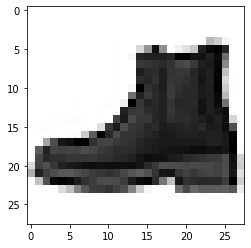

In [65]:
plt.imshow(x_train[n], cmap = 'Greys')

# 3.資料整理

In [66]:
x_train = x_train/255
x_test = x_test/255

In [67]:
x_train.shape

(60000, 28, 28)

In [68]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

### 將 y_train1, y_test1 存為 onehot (因為後面命名時會用到y_train, y_test)

In [84]:
from tensorflow.keras.utils import to_categorical

In [85]:
y_train1 = to_categorical(y_train, 10)
y_test1 = to_categorical(y_test, 10)

# 4.打造神經網路

### 改變神經元數量

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [99]:
model = Sequential()

In [100]:
model.add(Dense(92, input_dim = 784, activation = 'relu'))

In [101]:
model.add(Dense(92, activation = 'relu'))

In [102]:
model.add(Dense(10, activation = 'softmax'))

# 5.組裝神經網路

### 改變lr

In [103]:
model.compile(loss='mse', optimizer=SGD(lr=0.095),metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 92)                72220     
_________________________________________________________________
dense_10 (Dense)             (None, 92)                8556      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                930       
Total params: 81,706
Trainable params: 81,706
Non-trainable params: 0
_________________________________________________________________


# 6.訓練

### 訓練多筆資料(重複訓練多筆資料後正確率才有90%)

In [109]:
model.fit(x_train, y_train1, batch_size = 100, epochs=45)

Train on 60000 samples
Epoch 1/45
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0154 - accuracy: 0.8985
Epoch 2/45
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0153 - accuracy: 0.8985
Epoch 3/45
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0153 - accuracy: 0.8993
Epoch 4/45
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0152 - accuracy: 0.8998
Epoch 5/45
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0152 - accuracy: 0.8996
Epoch 6/45
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0151 - accuracy: 0.9007
Epoch 7/45
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0151 - accuracy: 0.9000
Epoch 8/45
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0151 - accuracy: 0.9009
Epoch 9/45
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0150 - accuracy: 0.9011
Epoch 10/45
60

# 7.訓練成果

In [110]:
result = model.predict_classes(x_test)

In [111]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 測試

這是 Shirt


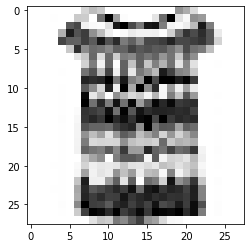

In [123]:
n = 3456
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n].reshape(28,28), cmap='Greys')

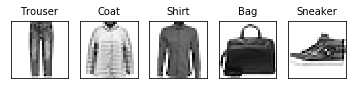

In [124]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n].reshape(28,28), cmap='Greys')  